In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("../00_data/data_with_calc_fields.csv", sep=";", decimal=",")

In [5]:
df.index = pd.to_datetime(df["datetime"])
df = df.loc['2016-01-01':'2016-01-30']
df = df.between_time("12:00", "16:59")
df

,datetime,date,hour,day_ahead_price,intraday_price,price_diff,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,...,mov_avg_10_wind_forecast_error,mov_avg_10_solar_forecast_error,mov_avg_1_forecast_error,mov_avg_1_wind_forecast_error,mov_avg_1_solar_forecast_error,mov_avg_1_day_ahead,mov_avg_1_intraday,season,month,weekday
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 12:00:00,2016-01-01 12:00:00,2016-01-01,12,27.06,29.75,2.69,39021,4121,44325,1287,...,54.688396,-22.845776,-324.378405,-290.532808,-33.845597,21.013810,25.174342,0,1,4
2016-01-01 13:00:00,2016-01-01 13:00:00,2016-01-01,13,26.59,28.45,1.86,39021,3717,44325,790,...,-65.339497,-41.396406,-496.574243,-435.417152,-61.157090,21.661444,25.554786,0,1,4
2016-01-01 14:00:00,2016-01-01 14:00:00,2016-01-01,14,25.00,26.42,1.42,39021,2442,44325,496,...,-162.496150,-53.727865,-626.648115,-548.134450,-78.513665,22.035668,25.651769,0,1,4
2016-01-01 15:00:00,2016-01-01 15:00:00,2016-01-01,15,24.43,28.25,3.82,39021,841,44325,405,...,-231.737267,-59.330433,-704.339745,-619.365497,-84.974249,22.295707,25.933953,0,1,4
2016-01-01 16:00:00,2016-01-01 16:00:00,2016-01-01,16,28.87,32.49,3.62,39021,51,44325,665,...,-273.910305,-55.602914,-725.315440,-649.313263,-76.002177,22.989859,26.626178,0,1,4
2016-01-02 12:00:00,2016-01-02 12:00:00,2016-01-02,12,22.54,29.36,6.82,39022,2043,44325,18329,...,522.960554,-122.470271,349.246029,604.963973,-255.717945,20.232989,18.725089,0,1,5
2016-01-02 13:00:00,2016-01-02 13:00:00,2016-01-02,13,19.79,28.60,8.81,39022,1869,44325,18394,...,473.920338,-141.106308,168.670132,464.163874,-295.493742,20.195993,19.549773,0,1,5
2016-01-02 14:00:00,2016-01-02 14:00:00,2016-01-02,14,16.90,30.22,13.32,39022,1178,44325,18540,...,416.080212,-150.344771,-4.318354,304.033515,-308.351868,19.921698,20.437757,0,1,5
2016-01-02 15:00:00,2016-01-02 15:00:00,2016-01-02,15,16.97,27.73,10.76,39022,382,44325,18754,...,348.626892,-151.242221,-175.591080,122.196495,-297.787575,19.676844,21.042675,0,1,5


No handles with labels found to put in legend.


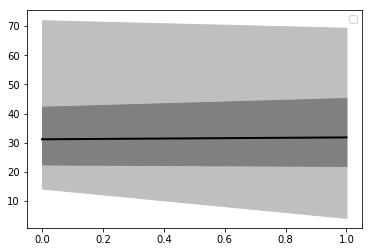

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = sm.graphics.fboxplot(df[["day_ahead_price", "intraday_price"]],
                           wfactor=10, labels=df["hour"].astype(int), 
                           ax=ax);